In [1]:
#### ###
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.insert(1, '../codes/')
from myUtils import *
from geeCodes import *


Populating the interactive namespace from numpy and matplotlib


In [2]:
########################## Read city file ###########################################
dfc = gpd.read_file('../data_revision/cities/all/gdfCities.shp')
dfc = dfc.to_crs("EPSG:4326")

In [3]:
##### world data ##############################################
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs('+proj=wintri') 

In [4]:
dfc = dfc.to_crs('+proj=wintri') 
DFC = pd.read_csv('../data_revision/various/DFC.csv')
DFC['X']=dfc['geometry'].centroid.x
DFC['Y']=dfc['geometry'].centroid.y
DFC['city']= dfc['UC_NM_MN']
dfc['suhi']=DFC['SUHI']

<bound method Figure.tight_layout of <Figure size 1152x864 with 5 Axes>>

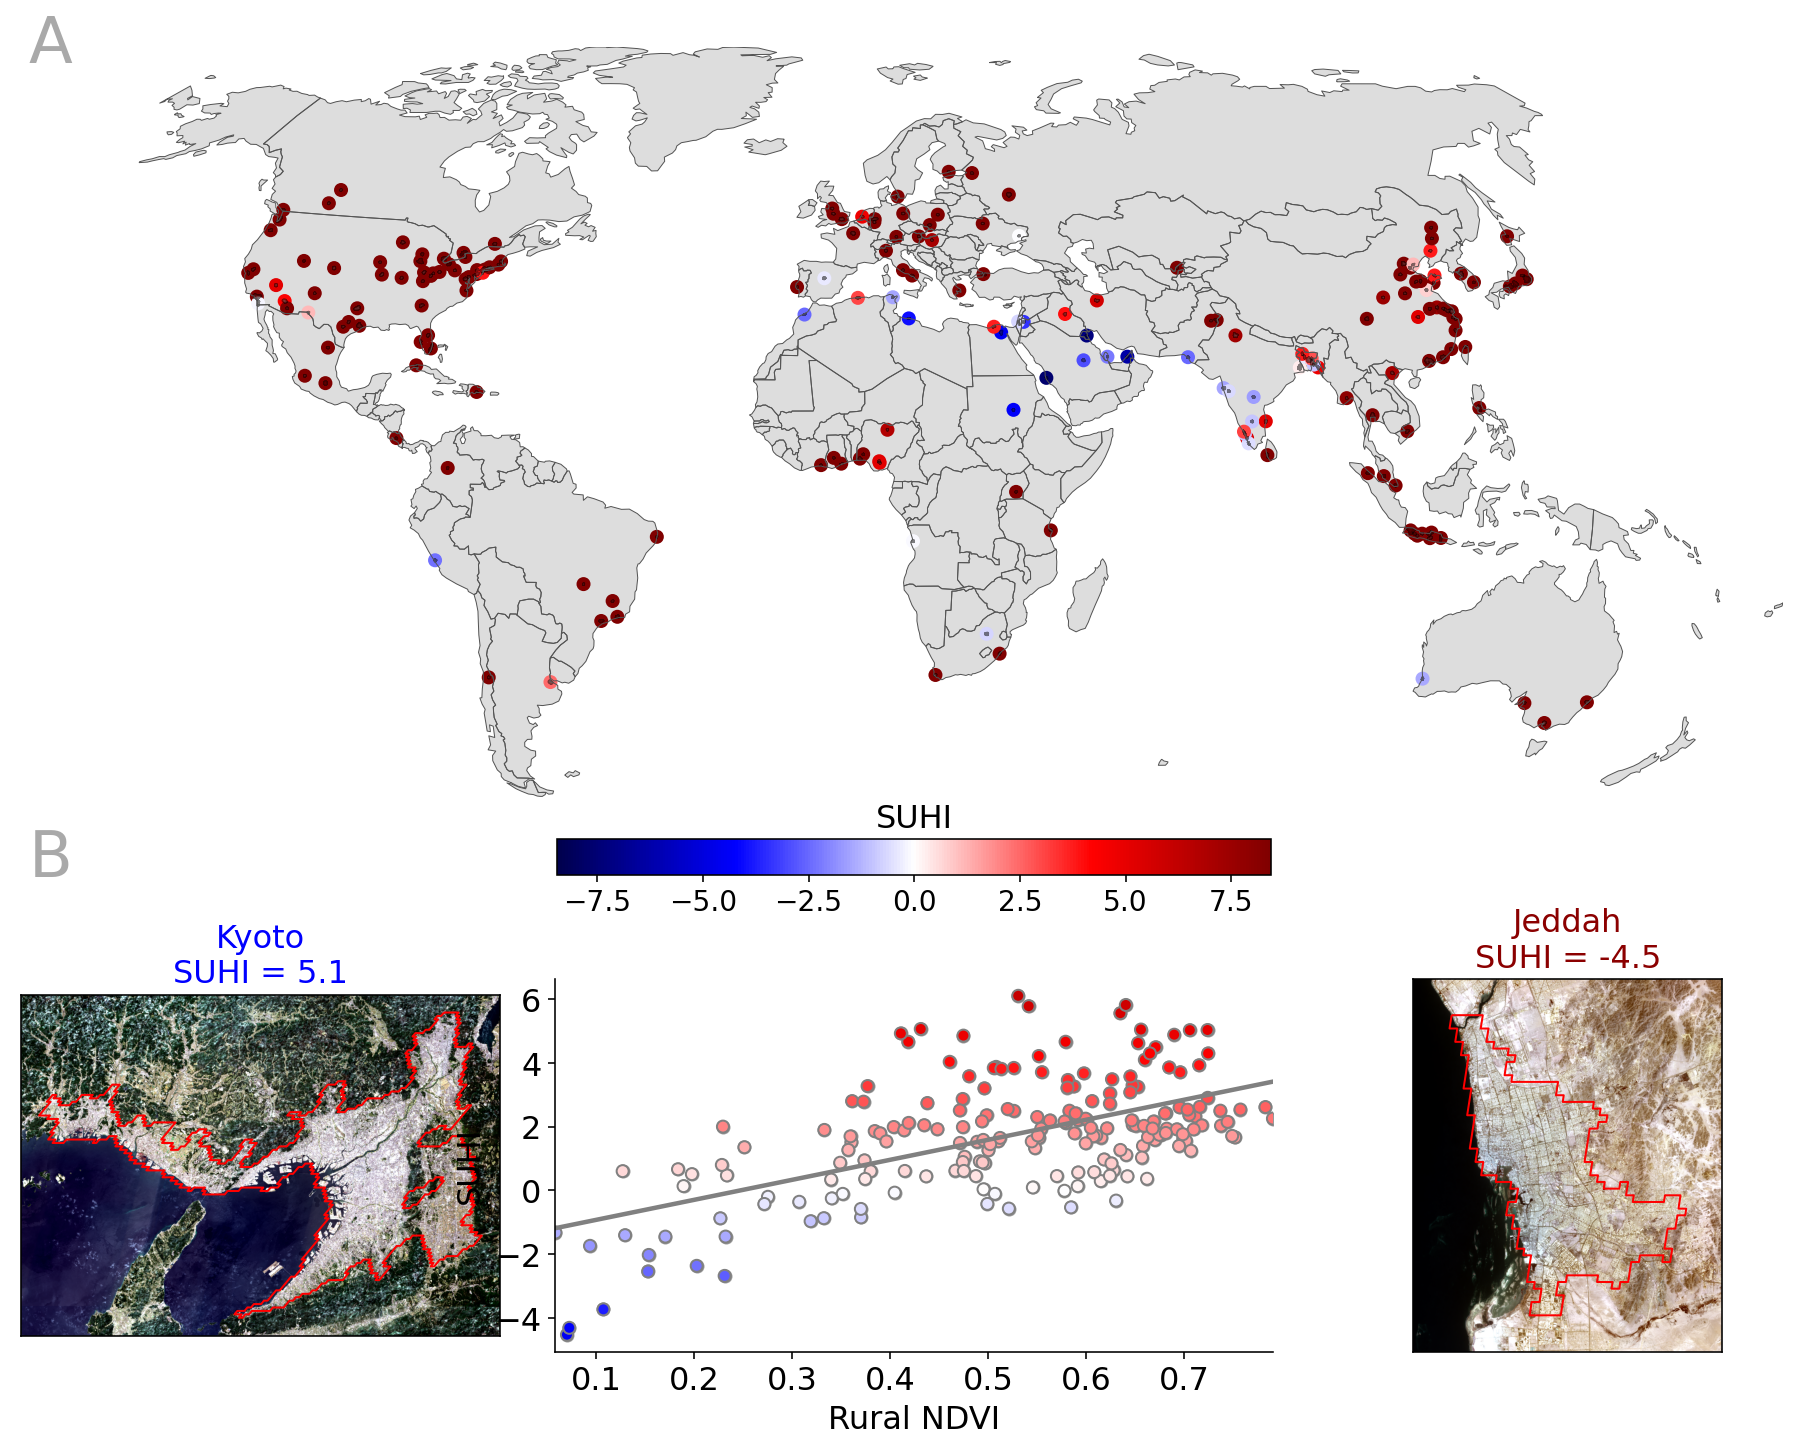

In [19]:
divnorm=colors.TwoSlopeNorm(vmin=-5., vcenter=0., vmax=1)
fs = 16
fs1 = 14
fig = plt.figure(figsize=(16,12))
gs = GridSpec(2, 3, width_ratios=[1, 1.5, 1], height_ratios=[2.5, 1], wspace=0.1, hspace=0)
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')
world.plot(ax=ax1, color='#DDD')
world.boundary.plot(ax=ax1, edgecolor='#555', lw=0.5)
ax1.scatter(DFC['X'], DFC['Y'], c=DFC['SUHI'], cmap='seismic',  norm=divnorm)
dfc.plot(ax=ax1, column='suhi',
              cmap='seismic',
              edgecolor='black', lw=1,
              markersize=95, 
              legend=True, legend_kwds={'shrink': 0.4, 'orientation': "horizontal", 'pad':0.01}, 
              vmin=-8.45, vmax=8.45, alpha=0.5)



cb_ax = fig.axes[-1]
cb_ax.tick_params(labelsize=fs1)
cb_ax.set_title(r'SUHI', size=fs)
ax1.set_xlim([-16646156, 19646156]);
ax1.set_ylim([-7018754, 9328438]);

ax1.text(-1.7*10000000, 0.9*10000000, 'A', fontsize=fs*2, color='darkgray')
ax1.text(-1.7*10000000, -0.8*10000000, 'B', fontsize=fs*2, color='darkgray')

ax = fig.add_subplot(gs[1,0])
f = '../data_revision/various/kyoto.tif'
city = rxr.open_rasterio(f)
with rio.open(f) as naip_src:
    naip_plot_extent2 = plotting_extent(naip_src)
ep.plot_rgb(city.values, rgb=[3, 2, 1], stretch=True, extent=naip_plot_extent2, str_clip=5, ax=ax)
gdfm = dfc[dfc['UC_NM_MN']=='Osaka [Kyoto]'] 
gdfm = gdfm.to_crs("EPSG:4326")
gdfm.boundary.plot(ax=ax, color='red', lw=1)
ax.set_title('Kyoto\n'+r'SUHI = 5.1',size=fs, color='blue')




ax2 = fig.add_subplot(gs[1,1])
ax2=setFont(ax2,'Arial',fs);
sns.regplot(x='ruralNDVI', y='SUHI', data=DFC, ci=0, color='gray', ax=ax2)
t = dfc.suhi
ax2.scatter(DFC.ruralNDVI, DFC.SUHI, c=t, cmap='seismic',vmin=-8.45, vmax=8.45, edgecolors='gray')
ax2.set_ylabel('\n\nSUHI', size=fs)
ax2.set_xlabel('Rural NDVI', size=fs);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False);
asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
#ax2.set_aspect(asp/1.6)
#ax2.set_xlim([0.05,0.8])


ax = fig.add_subplot(gs[1,2])
f = '../data_revision/various/Jeddah1.tif'
kyoto = rxr.open_rasterio(f)
with rio.open(f) as naip_src:
    # Create plotting extent from DatasetReader object
    naip_plot_extent1 = plotting_extent(naip_src)
ep.plot_rgb(kyoto.values, rgb=[0, 1, 2], 
            stretch=True, extent=naip_plot_extent1, str_clip=4, ax=ax)
gdfm = dfc[dfc['UC_NM_MN']=='Jeddah']
gdfm = gdfm.to_crs("EPSG:4326")
gdfm.boundary.plot(ax=ax, color='red', lw=1)
ax.set_title('Jeddah\n'+r'SUHI = -4.5',size=fs, color='darkred')

fig.tight_layout

In [31]:
fig.savefig('../figures_revision/Figure1.pdf', bbox_inches = 'tight')